## This is the softmax workbook for ECE C147/C247 Assignment #2

Please follow the notebook linearly to implement a softmax classifier.

Please print out the workbook entirely when completed.

We thank Serena Yeung & Justin Johnson for permission to use code written for the CS 231n class (cs231n.stanford.edu).  These are the functions in the cs231n folders and code in the jupyer notebook to preprocess and show the images.  The classifiers used are based off of code prepared for CS 231n as well.

The goal of this workbook is to give you experience with training a softmax classifier.

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
cd /content/gdrive


/content/gdrive/My Drive/Colab Notebooks/ee247/hw2


In [0]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [5]:
def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000, num_dev=500):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the linear classifier. These are the same steps as we used for the
    SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = '/content/gdrive/My Drive/Colab Notebooks/ee247/cifar-10-batches-py' # You need to update this line
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
    
    # subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]
    mask = np.random.choice(num_training, num_dev, replace=False)
    X_dev = X_train[mask]
    y_dev = y_train[mask]
    
    # Preprocessing: reshape the image data into rows
    X_train = np.reshape(X_train, (X_train.shape[0], -1))
    X_val = np.reshape(X_val, (X_val.shape[0], -1))
    X_test = np.reshape(X_test, (X_test.shape[0], -1))
    X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))
    
    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis = 0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image
    X_dev -= mean_image
    
    # add bias dimension and transform into columns
    X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
    X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
    X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
    X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])
    
    return X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)
print('dev data shape: ', X_dev.shape)
print('dev labels shape: ', y_dev.shape)

Train data shape:  (49000, 3073)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3073)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3073)
Test labels shape:  (1000,)
dev data shape:  (500, 3073)
dev labels shape:  (500,)


## Training a softmax classifier.

The following cells will take you through building a softmax classifier.  You will implement its loss function, then subsequently train it with gradient descent.  Finally, you will choose the learning rate of gradient descent to optimize its classification performance.

In [0]:
from nndl import Softmax

In [0]:
# Declare an instance of the Softmax class.  
# Weights are initialized to a random value.
# Note, to keep people's first solutions consistent, we are going to use a random seed.

np.random.seed(1)

num_classes = len(np.unique(y_train))
num_features = X_train.shape[1]

softmax = Softmax(dims=[num_classes, num_features])

#### Softmax loss

In [0]:
## Implement the loss function of the softmax using a for loop over
#  the number of examples

loss = softmax.loss(X_train, y_train)

In [9]:
print(loss)

2.3277607028048966


## Question: 

You'll notice the loss returned by the softmax is about 2.3 (if implemented correctly).  Why does this make sense?

## Answer:

for totally random case. Every sample have 10% chance to be the case. loss = -0.1 +log(10*exp(0.1)) = 2.3

#### Softmax gradient

In [10]:
## Calculate the gradient of the softmax loss in the Softmax class.
# For convenience, we'll write one function that computes the loss
#   and gradient together, softmax.loss_and_grad(X, y)
# You may copy and paste your loss code from softmax.loss() here, and then
#   use the appropriate intermediate values to calculate the gradient.

loss, grad = softmax.loss_and_grad(X_dev,y_dev)

# Compare your gradient to a gradient check we wrote. 
# You should see relative gradient errors on the order of 1e-07 or less if you implemented the gradient correctly.
softmax.grad_check_sparse(X_dev, y_dev, grad)

numerical: -1.169895 analytic: -1.169895, relative error: 1.348136e-08
numerical: 0.954984 analytic: 0.954984, relative error: 2.764034e-08
numerical: -0.444979 analytic: -0.444979, relative error: 9.276438e-09
numerical: 1.179582 analytic: 1.179582, relative error: 1.162461e-08
numerical: 0.073513 analytic: 0.073513, relative error: 6.415757e-07
numerical: 1.539462 analytic: 1.539462, relative error: 1.924209e-08
numerical: -1.356969 analytic: -1.356970, relative error: 3.749098e-08
numerical: -0.728698 analytic: -0.728698, relative error: 2.293228e-09
numerical: 0.479217 analytic: 0.479217, relative error: 5.657172e-08
numerical: -2.893658 analytic: -2.893658, relative error: 1.498593e-08


## A vectorized version of Softmax

To speed things up, we will vectorize the loss and gradient calculations.  This will be helpful for stochastic gradient descent.

In [0]:
import time

In [12]:
## Implement softmax.fast_loss_and_grad which calculates the loss and gradient
#    WITHOUT using any for loops.  

# Standard loss and gradient
tic = time.time()
loss, grad = softmax.loss_and_grad(X_dev, y_dev)
toc = time.time()
print('Normal loss / grad_norm: {} / {} computed in {}s'.format(loss, np.linalg.norm(grad, 'fro'), toc - tic))

tic = time.time()
loss_vectorized, grad_vectorized = softmax.fast_loss_and_grad(X_dev, y_dev)
toc = time.time()
print('Vectorized loss / grad: {} / {} computed in {}s'.format(loss_vectorized, np.linalg.norm(grad_vectorized, 'fro'), toc - tic))

# The losses should match but your vectorized implementation should be much faster.
print('difference in loss / grad: {} /{} '.format(loss - loss_vectorized, np.linalg.norm(grad - grad_vectorized)))

# You should notice a speedup with the same output.

Normal loss / grad_norm: 2.354003480375981 / 333.0669193577208 computed in 0.04684138298034668s
Vectorized loss / grad: 2.3540034803759844 / 333.0669193577208 computed in 0.007723331451416016s
difference in loss / grad: -3.552713678800501e-15 /2.2076559613451779e-13 


## Stochastic gradient descent

We now implement stochastic gradient descent.  This uses the same principles of gradient descent we discussed in class, however, it calculates the gradient by only using examples from a subset of the training set (so each gradient calculation is faster).

## Question:

How should the softmax gradient descent training step differ from the svm training step, if at all?

## Answer:

for softmax gradient, each step will update weight even though two step are using same data. For SVM, the weight might be same as pervious iteration. 

iteration 0 / 1500: loss 2.3365926606637535
iteration 100 / 1500: loss 2.0557222613850814
iteration 200 / 1500: loss 2.03577451206628
iteration 300 / 1500: loss 1.9813348165609879
iteration 400 / 1500: loss 1.9583142443981618
iteration 500 / 1500: loss 1.8622653073541349
iteration 600 / 1500: loss 1.853261145435938
iteration 700 / 1500: loss 1.8353062223725827
iteration 800 / 1500: loss 1.829389246882764
iteration 900 / 1500: loss 1.8992158530357477
iteration 1000 / 1500: loss 1.9783503540252299
iteration 1100 / 1500: loss 1.8470797913532633
iteration 1200 / 1500: loss 1.8411450268664082
iteration 1300 / 1500: loss 1.7910402495792104
iteration 1400 / 1500: loss 1.8705803029382262
That took 5.970340728759766s


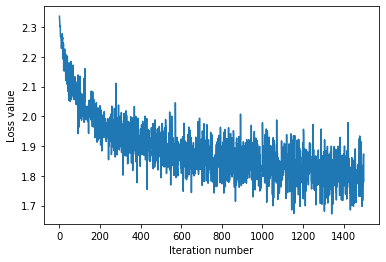

In [13]:
# Implement softmax.train() by filling in the code to extract a batch of data
# and perform the gradient step.
import time

tic = time.time()
loss_hist = softmax.train(X_train, y_train, learning_rate=1e-7,
                      num_iters=1500, verbose=True)
toc = time.time()
print('That took {}s'.format(toc - tic))

plt.plot(loss_hist)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.show()

### Evaluate the performance of the trained softmax classifier on the validation data.

In [14]:
## Implement softmax.predict() and use it to compute the training and testing error.

y_train_pred = softmax.predict(X_train)
print('training accuracy: {}'.format(np.mean(np.equal(y_train,y_train_pred), )))
y_val_pred = softmax.predict(X_val)
print('validation accuracy: {}'.format(np.mean(np.equal(y_val, y_val_pred)), ))

training accuracy: 0.3811428571428571
validation accuracy: 0.398


## Optimize the softmax classifier

You may copy and paste your optimization code from the SVM here.

In [15]:
np.finfo(float).eps

2.220446049250313e-16

iteration 0 / 1500: loss 2.3109265562612116
iteration 100 / 1500: loss 2.259212525047752
iteration 200 / 1500: loss 2.1921601578957133
iteration 300 / 1500: loss 2.1833712426445664
iteration 400 / 1500: loss 2.1665072489669384
iteration 500 / 1500: loss 2.0845081273852544
iteration 600 / 1500: loss 2.0788554272274427
iteration 700 / 1500: loss 2.125962118845423
iteration 800 / 1500: loss 2.0584622552786187
iteration 900 / 1500: loss 2.0729572777779732
iteration 1000 / 1500: loss 2.0367628908149027
iteration 1100 / 1500: loss 2.121999210130625
iteration 1200 / 1500: loss 2.046341128913291
iteration 1300 / 1500: loss 1.9516278379321108
iteration 1400 / 1500: loss 2.1179779234831138
iteration 0 / 1500: loss 2.381784042234951
iteration 100 / 1500: loss 2.1339632677081553
iteration 200 / 1500: loss 2.0458234155787776
iteration 300 / 1500: loss 2.0092586881739476
iteration 400 / 1500: loss 1.9728652634560673
iteration 500 / 1500: loss 1.9394536008278231
iteration 600 / 1500: loss 1.955419815

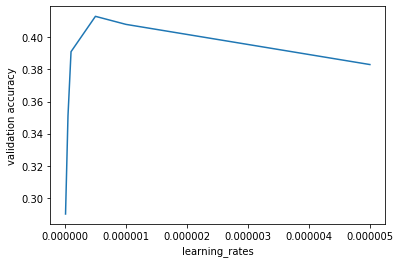

best best validation accuracy:0.413000 and its learning rate: 0.000000


In [17]:
# ================================================================ #
# YOUR CODE HERE:
#   Train the Softmax classifier with different learning rates and 
#     evaluate on the validation data.
#   Report:
#     - The best learning rate of the ones you tested.  
#     - The best validation accuracy corresponding to the best validation error.
#
#   Select the SVM that achieved the best validation error and report
#     its error rate on the test set.
# ================================================================ #

learning_rates = np.array([1e-8,5e-8,1e-7,5e-7,1e-6,5e-6])
validation = np.zeros(6)
for i in np.arange(6):
    loss_hist = softmax.train(X_train, y_train, learning_rate=learning_rates[i],num_iters=1500, verbose=True)
    y_val_pred = softmax.predict(X_val)
    validation[i] = np.mean(np.equal(y_val, y_val_pred))

plt.plot(learning_rates,validation)
plt.xlabel('learning_rates')
plt.ylabel('validation accuracy')
plt.show()     
n = np.argmax(validation)
print("best best validation accuracy:%f and its learning rate: %f"%(validation[n],learning_rates[n]))

# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #
